In [5]:
!pip install Crypto

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 kB 9.4 MB/s eta 0:00:00


In [6]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00


Custom Algorithm - 平均加密时间：0.000377 秒
Custom Algorithm - 平均解密时间：0.000291 秒


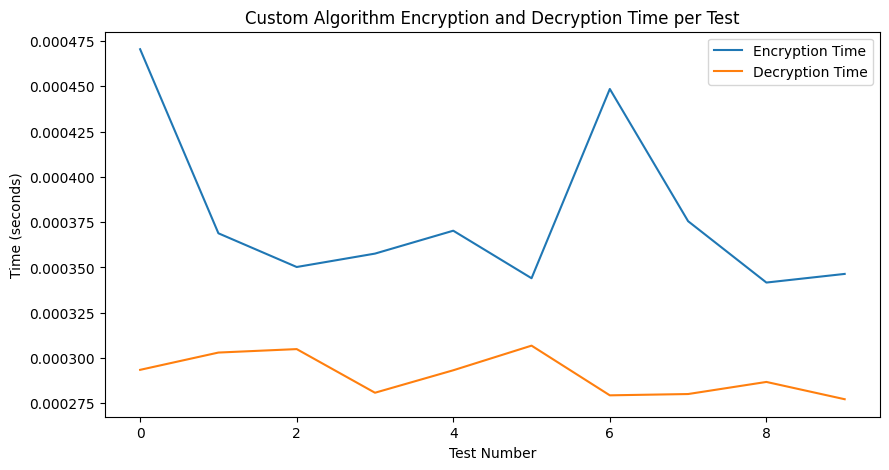

In [7]:
import random
import hashlib
import time
import matplotlib.pyplot as plt

# 1. 信息转录与编码：通过置换矩阵模拟DNA到RNA的转录过程
def generate_substitution_matrix(seed):
    random.seed(seed)
    bases = ['A', 'C', 'G', 'T']  # 碱基
    substitution = dict()
    shuffled_bases = random.sample(bases, len(bases))
    for i, base in enumerate(bases):
        substitution[base] = shuffled_bases[i]
    return substitution

def transcribe_dna_to_rna(plaintext, substitution_matrix):
    transcribed = ''.join([substitution_matrix.get(char, char) for char in plaintext])
    return transcribed

# 2. 剪接与数据重组：模拟mRNA剪接，随机选择不同数据块重新组合
def split_and_splice(data, block_size=3):
    blocks = [data[i:i+block_size] for i in range(0, len(data), block_size)]
    original_order = blocks.copy()  # 保存原始顺序以用于解密
    random.shuffle(blocks)  # 随机排列数据块，模拟可变剪接
    spliced_data = ''.join(blocks)
    return spliced_data, original_order

def inverse_splice(data, original_order):
    return ''.join(original_order)

# 3. miRNA调控与动态密钥生成
def generate_dynamic_key(seed=None):
    if seed is None:
        seed = int(time.time())  # 使用时间戳作为种子
    seed_str = str(seed)
    hash_object = hashlib.sha256(seed_str.encode())
    dynamic_key = int(hash_object.hexdigest(), 16) % (2**128)
    return dynamic_key

def apply_dynamic_key(data, key):
    key_bin = format(key, '0128b')
    data_bin = ''.join(format(ord(char), '08b') for char in data)
    encrypted_data = ''.join('1' if data_bin[i] != key_bin[i % len(key_bin)] else '0' for i in range(len(data_bin)))
    chars = [chr(int(encrypted_data[i:i+8], 2)) for i in range(0, len(encrypted_data), 8)]
    return ''.join(chars)

def reverse_dynamic_key(data, key):
    return apply_dynamic_key(data, key)

# 4. 数据编辑与冗余保护
def insert_redundancy(encrypted_data):
    redundancy = ''.join(random.choice('01') for _ in range(8))
    return encrypted_data + redundancy

# 自定义加密过程
def custom_encrypt(plaintext, seed=None):
    start_time = time.time()
    substitution_matrix = generate_substitution_matrix(seed)
    transcribed_data = transcribe_dna_to_rna(plaintext, substitution_matrix)
    spliced_data, original_order = split_and_splice(transcribed_data)
    dynamic_key = generate_dynamic_key(seed)
    encrypted_data = apply_dynamic_key(spliced_data, dynamic_key)
    encrypted_with_redundancy = insert_redundancy(encrypted_data)
    encryption_time = time.time() - start_time
    return encrypted_with_redundancy, original_order, encryption_time

# 自定义解密过程
def custom_decrypt(encrypted_with_redundancy, seed, original_order):
    start_time = time.time()
    encrypted_data = encrypted_with_redundancy[:-8]
    dynamic_key = generate_dynamic_key(seed)
    decrypted_spliced_data = reverse_dynamic_key(encrypted_data, dynamic_key)
    decrypted_data = inverse_splice(decrypted_spliced_data, original_order)
    decryption_time = time.time() - start_time
    return decrypted_data, decryption_time

# 测试自定义算法
def test_custom_encryption(num_tests=10):
    data = "ACGTACGTACGT" * 10
    seed = "123456789"
    encryption_times = []
    decryption_times = []

    for _ in range(num_tests):
        encrypted_data, original_order, encryption_time = custom_encrypt(data, seed)
        decrypted_data, decryption_time = custom_decrypt(encrypted_data, seed, original_order)

        encryption_times.append(encryption_time)
        decryption_times.append(decryption_time)

    avg_encryption_time = sum(encryption_times) / len(encryption_times)
    avg_decryption_time = sum(decryption_times) / len(decryption_times)

    print(f"Custom Algorithm - 平均加密时间：{avg_encryption_time:.6f} 秒")
    print(f"Custom Algorithm - 平均解密时间：{avg_decryption_time:.6f} 秒")

    plt.figure(figsize=(10, 5))
    plt.plot(encryption_times, label='Encryption Time')
    plt.plot(decryption_times, label='Decryption Time')
    plt.xlabel('Test Number')
    plt.ylabel('Time (seconds)')
    plt.title('Custom Algorithm Encryption and Decryption Time per Test')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    test_custom_encryption()


RSA Algorithm - 平均加密时间：0.002199 秒
RSA Algorithm - 平均解密时间：0.054125 秒


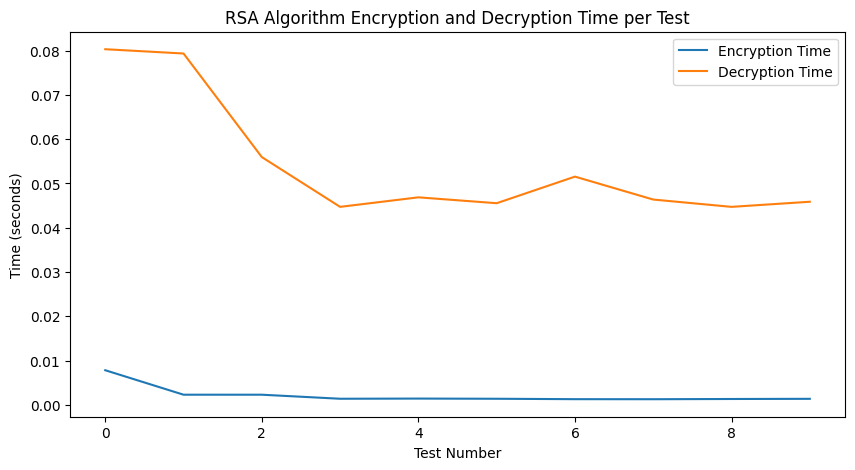

In [8]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import time
import matplotlib.pyplot as plt

# 生成RSA密钥对
def generate_rsa_keys():
    key = RSA.generate(2048)
    private_key = key.export_key()
    public_key = key.publickey().export_key()
    return private_key, public_key

# RSA加密
def rsa_encrypt(public_key, data):
    rsa_key = RSA.import_key(public_key)
    cipher_rsa = PKCS1_OAEP.new(rsa_key)
    encrypted = cipher_rsa.encrypt(data.encode())
    return encrypted

# RSA解密
def rsa_decrypt(private_key, data):
    rsa_key = RSA.import_key(private_key)
    cipher_rsa = PKCS1_OAEP.new(rsa_key)
    decrypted = cipher_rsa.decrypt(data).decode()
    return decrypted

# 测试RSA算法
def test_rsa_encryption(num_tests=10):
    data = "ACGTACGTACGT" * 10  # 增加序列长度
    rsa_private, rsa_public = generate_rsa_keys()

    encryption_times = []
    decryption_times = []

    for _ in range(num_tests):
        start_time = time.time()
        encrypted_data = rsa_encrypt(rsa_public, data)
        encryption_time = time.time() - start_time
        encryption_times.append(encryption_time)

        start_time = time.time()
        decrypted_data = rsa_decrypt(rsa_private, encrypted_data)
        decryption_time = time.time() - start_time
        decryption_times.append(decryption_time)

    avg_encryption_time = sum(encryption_times) / len(encryption_times)
    avg_decryption_time = sum(decryption_times) / len(decryption_times)

    print(f"RSA Algorithm - 平均加密时间：{avg_encryption_time:.6f} 秒")
    print(f"RSA Algorithm - 平均解密时间：{avg_decryption_time:.6f} 秒")

    plt.figure(figsize=(10, 5))
    plt.plot(encryption_times, label='Encryption Time')
    plt.plot(decryption_times, label='Decryption Time')
    plt.xlabel('Test Number')
    plt.ylabel('Time (seconds)')
    plt.title('RSA Algorithm Encryption and Decryption Time per Test')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    test_rsa_encryption()


AES Algorithm - 平均加密时间：0.000105 秒
AES Algorithm - 平均解密时间：0.000037 秒


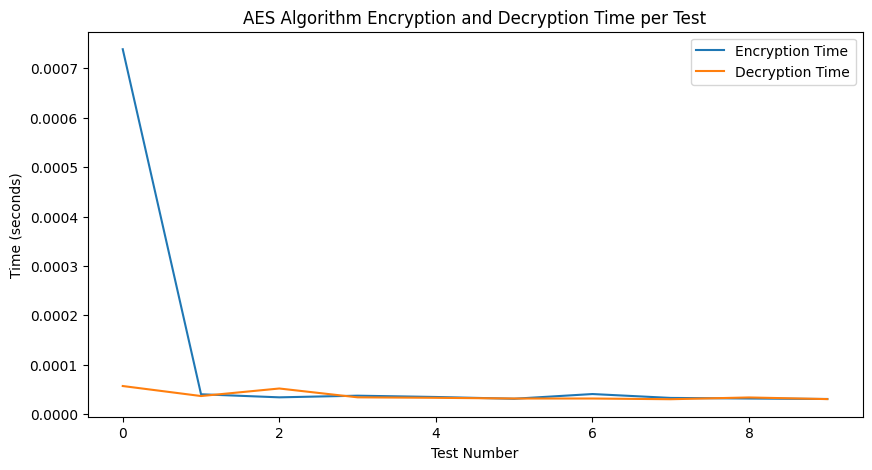

In [11]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import time
import matplotlib.pyplot as plt

# AES加密
def aes_encrypt(data):
    key = get_random_bytes(16)  # 生成随机的16字节密钥
    cipher_aes = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher_aes.encrypt(pad(data.encode(), AES.block_size))
    return cipher_aes.iv + ct_bytes, key

# AES解密
def aes_decrypt(key, data):
    iv = data[:AES.block_size]
    cipher_aes = AES.new(key, AES.MODE_CBC, iv)
    decrypted = unpad(cipher_aes.decrypt(data[AES.block_size:]), AES.block_size).decode()
    return decrypted

# 测试AES算法
def test_aes_encryption(num_tests=10):
    data = "ACGTACGTACGT" * 10
    encryption_times = []
    decryption_times = []

    for _ in range(num_tests):
        start_time = time.time()
        encrypted_data, aes_key = aes_encrypt(data)
        encryption_time = time.time() - start_time
        encryption_times.append(encryption_time)

        start_time = time.time()
        decrypted_data = aes_decrypt(aes_key, encrypted_data)
        decryption_time = time.time() - start_time
        decryption_times.append(decryption_time)

    avg_encryption_time = sum(encryption_times) / len(encryption_times)
    avg_decryption_time = sum(decryption_times) / len(decryption_times)

    print(f"AES Algorithm - 平均加密时间：{avg_encryption_time:.6f} 秒")
    print(f"AES Algorithm - 平均解密时间：{avg_decryption_time:.6f} 秒")

    plt.figure(figsize=(10, 5))
    plt.plot(encryption_times, label='Encryption Time')
    plt.plot(decryption_times, label='Decryption Time')
    plt.xlabel('Test Number')
    plt.ylabel('Time (seconds)')
    plt.title('AES Algorithm Encryption and Decryption Time per Test')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    test_aes_encryption()


下面分割的是jupyter notebook的全部的代码

In [12]:
import random
import hashlib
import time
import matplotlib.pyplot as plt

# 自定义加密函数
def generate_substitution_matrix(seed):
    random.seed(seed)
    bases = ['A', 'C', 'G', 'T']
    substitution = dict()
    shuffled_bases = random.sample(bases, len(bases))
    for i, base in enumerate(bases):
        substitution[base] = shuffled_bases[i]
    return substitution

def transcribe_dna_to_rna(plaintext, substitution_matrix):
    transcribed = ''.join([substitution_matrix.get(char, char) for char in plaintext])
    return transcribed

def split_and_splice(data, block_size=3):
    blocks = [data[i:i+block_size] for i in range(0, len(data), block_size)]
    original_order = blocks.copy()
    random.shuffle(blocks)
    spliced_data = ''.join(blocks)
    return spliced_data, original_order

def inverse_splice(data, original_order):
    return ''.join(original_order)

def generate_dynamic_key(seed=None):
    if seed is None:
        seed = int(time.time())
    seed_str = str(seed)
    hash_object = hashlib.sha256(seed_str.encode())
    dynamic_key = int(hash_object.hexdigest(), 16) % (2**128)
    return dynamic_key

def apply_dynamic_key(data, key):
    key_bin = format(key, '0128b')
    data_bin = ''.join(format(ord(char), '08b') for char in data)
    encrypted_data = ''.join('1' if data_bin[i] != key_bin[i % len(key_bin)] else '0' for i in range(len(data_bin)))
    chars = [chr(int(encrypted_data[i:i+8], 2)) for i in range(0, len(encrypted_data), 8)]
    return ''.join(chars)

def reverse_dynamic_key(data, key):
    return apply_dynamic_key(data, key)

def insert_redundancy(encrypted_data):
    redundancy = ''.join(random.choice('01') for _ in range(8))
    return encrypted_data + redundancy

def custom_encrypt(plaintext, seed=None):
    substitution_matrix = generate_substitution_matrix(seed)
    transcribed_data = transcribe_dna_to_rna(plaintext, substitution_matrix)
    spliced_data, original_order = split_and_splice(transcribed_data)
    dynamic_key = generate_dynamic_key(seed)
    encrypted_data = apply_dynamic_key(spliced_data, dynamic_key)
    encrypted_with_redundancy = insert_redundancy(encrypted_data)
    return encrypted_with_redundancy, original_order

def custom_decrypt(encrypted_with_redundancy, seed, original_order):
    encrypted_data = encrypted_with_redundancy[:-8]
    dynamic_key = generate_dynamic_key(seed)
    decrypted_spliced_data = reverse_dynamic_key(encrypted_data, dynamic_key)
    decrypted_data = inverse_splice(decrypted_spliced_data, original_order)
    return decrypted_data

def test_custom_encryption(num_tests=10):
    data = "ACGTACGTACGT" * 10
    seed = "123456789"
    encryption_times = []
    decryption_times = []

    for _ in range(num_tests):
        start_time = time.time()
        encrypted_data, original_order = custom_encrypt(data, seed)
        encryption_times.append(time.time() - start_time)

        start_time = time.time()
        decrypted_data = custom_decrypt(encrypted_data, seed, original_order)
        decryption_times.append(time.time() - start_time)

    return encryption_times, decryption_times


In [13]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP

def generate_rsa_keys():
    key = RSA.generate(2048)
    private_key = key.export_key()
    public_key = key.publickey().export_key()
    return private_key, public_key

def rsa_encrypt(public_key, data):
    rsa_key = RSA.import_key(public_key)
    cipher_rsa = PKCS1_OAEP.new(rsa_key)
    encrypted = cipher_rsa.encrypt(data.encode())
    return encrypted

def rsa_decrypt(private_key, data):
    rsa_key = RSA.import_key(private_key)
    cipher_rsa = PKCS1_OAEP.new(rsa_key)
    decrypted = cipher_rsa.decrypt(data).decode()
    return decrypted

def test_rsa_encryption(num_tests=10):
    data = "ACGTACGTACGT" * 10
    rsa_private, rsa_public = generate_rsa_keys()

    encryption_times = []
    decryption_times = []

    for _ in range(num_tests):
        start_time = time.time()
        encrypted_data = rsa_encrypt(rsa_public, data)
        encryption_times.append(time.time() - start_time)

        start_time = time.time()
        decrypted_data = rsa_decrypt(rsa_private, encrypted_data)
        decryption_times.append(time.time() - start_time)

    return encryption_times, decryption_times


In [14]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

def aes_encrypt(data):
    key = get_random_bytes(16)
    cipher_aes = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher_aes.encrypt(pad(data.encode(), AES.block_size))
    return cipher_aes.iv + ct_bytes, key

def aes_decrypt(key, data):
    iv = data[:AES.block_size]
    cipher_aes = AES.new(key, AES.MODE_CBC, iv)
    decrypted = unpad(cipher_aes.decrypt(data[AES.block_size:]), AES.block_size).decode()
    return decrypted

def test_aes_encryption(num_tests=10):
    data = "ACGTACGTACGT" * 10
    encryption_times = []
    decryption_times = []

    for _ in range(num_tests):
        start_time = time.time()
        encrypted_data, aes_key = aes_encrypt(data)
        encryption_times.append(time.time() - start_time)

        start_time = time.time()
        decrypted_data = aes_decrypt(aes_key, encrypted_data)
        decryption_times.append(time.time() - start_time)

    return encryption_times, decryption_times


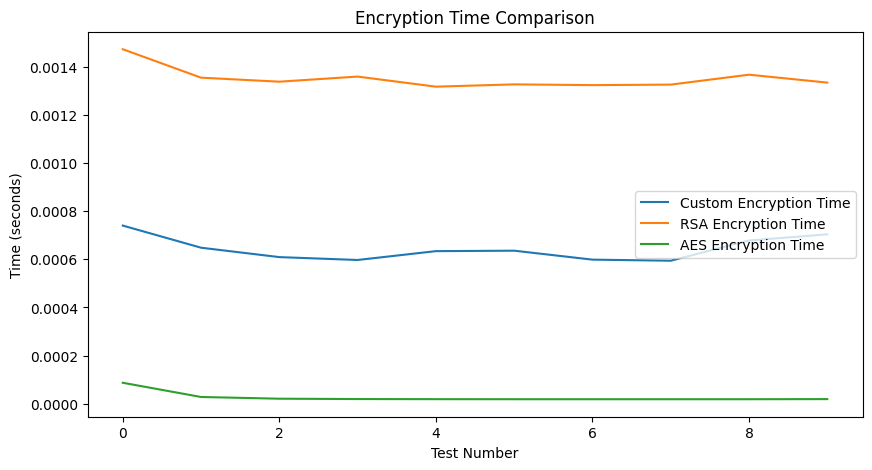

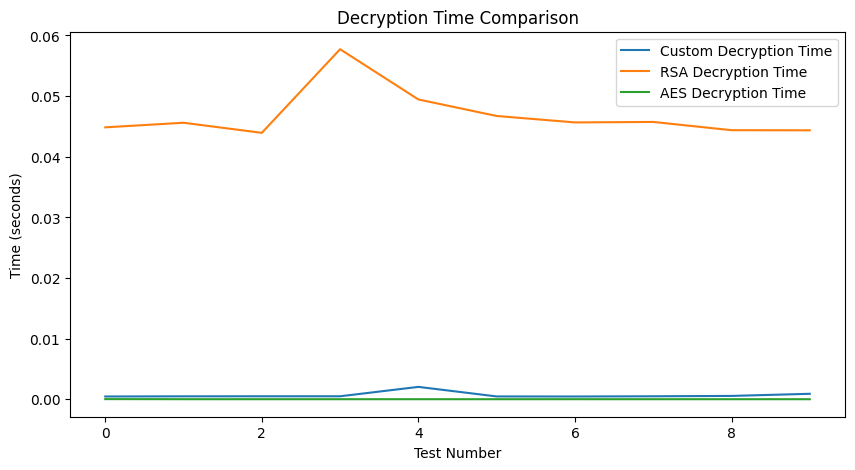

In [15]:
def run_comparison():
    num_tests = 10

    # 测试自定义算法
    custom_enc_times, custom_dec_times = test_custom_encryption(num_tests)

    # 测试RSA算法
    rsa_enc_times, rsa_dec_times = test_rsa_encryption(num_tests)

    # 测试AES算法
    aes_enc_times, aes_dec_times = test_aes_encryption(num_tests)

    # 绘制加密时间对比
    plt.figure(figsize=(10, 5))
    plt.plot(custom_enc_times, label='Custom Encryption Time')
    plt.plot(rsa_enc_times, label='RSA Encryption Time')
    plt.plot(aes_enc_times, label='AES Encryption Time')
    plt.xlabel('Test Number')
    plt.ylabel('Time (seconds)')
    plt.title('Encryption Time Comparison')
    plt.legend()
    plt.show()

    # 绘制解密时间对比
    plt.figure(figsize=(10, 5))
    plt.plot(custom_dec_times, label='Custom Decryption Time')
    plt.plot(rsa_dec_times, label='RSA Decryption Time')
    plt.plot(aes_dec_times, label='AES Decryption Time')
    plt.xlabel('Test Number')
    plt.ylabel('Time (seconds)')
    plt.title('Decryption Time Comparison')
    plt.legend()
    plt.show()

run_comparison()
